In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rocole-a-robusta-coffee-leaf-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Welder\.cache\kagglehub\datasets\nirmalsankalana\rocole-a-robusta-coffee-leaf-images-dataset\versions\1


In [3]:
import os

print(os.listdir(path))

['coffee___healthy', 'coffee___red_spider_mite', 'coffee___rust']


In [4]:
import tensorflow as tf

train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

test = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

Found 1560 files belonging to 3 classes.
Using 1248 files for training.
Found 1560 files belonging to 3 classes.
Using 312 files for validation.


In [5]:
import numpy as np

X_train = np.concatenate([x.numpy() for x, y in train])
y_train = np.concatenate([y.numpy() for x, y in train])

X_test = np.concatenate([x.numpy() for x, y in test])
y_test = np.concatenate([y.numpy() for x, y in test])

In [6]:
X_train = X_train.reshape((1248,224*224*3))

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
acc = (rf_classifier.predict(X_train) == y_train).mean()
acc

np.float64(0.9807692307692307)

In [14]:
X_train = X_train / 255

In [15]:
def plot_leaf(image_data):
  image = image_data.reshape((224,224,3))
  plt.imshow(image,cmap = "binary")
  plt.axis("off")

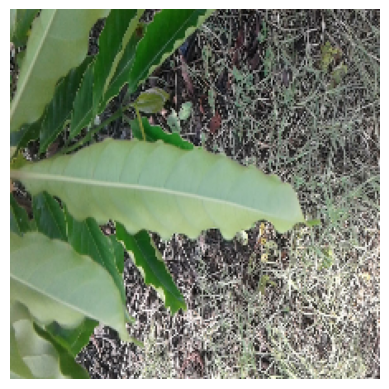

In [16]:
leaf = X_train[900]
plot_leaf(leaf)
plt.show()

In [17]:
rf_classifier.predict([leaf])

array([0], dtype=int32)

In [18]:
y_train[900]

np.int32(0)

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_classifier,X_train,y_train,cv = 3,scoring = "accuracy")

array([0.49278846, 0.49519231, 0.50240385])

Trying another classifier to prevent overfitting

In [20]:
from sklearn.svm import SVC

svc = SVC(random_state = 42)

svc.fit(X_train,y_train)

SVC(random_state=42)

In [21]:
acc = (svc.predict(X_train) == y_train).mean()
acc

np.float64(0.7652243589743589)

In [22]:
cross_val_score(svc,X_train,y_train,cv = 3,scoring = "accuracy")

array([0.51923077, 0.50721154, 0.51923077])